# United Kingdom Traffic Accidents Throughout 2012 to 2014

```Location_Easting_OSGR```: Vertical lines running from the top to bottom and divide the map from west to east.

```Location_Northing_OSGR```: Horizontal lines running left to right and divide the map from north to south.



```Longitude```: Vertical lines that measure east or west.



```Latitude```: Horizontal lines that measure distance north or south.

```Accident_Severity```: The classification of the severity of an accident (as fatal, serious or slight)







- 1st_Road_Class
- 1st_Road_Number
- Road_Type
- Speed_limit
- 2nd_Road_Class: A road of higher classification, A road of lower classification, Unclassified
- 2nd_Road_Number: 0 means there was no 2nd road
- Pedestrian_Crossing-Human_Control: None within 50 meters, Control by other authorised person, Control by school crossing patrol
- Pedestrian_Crossing-Physical_Facilities: No physical crossing within 50 meters, Zebra, Pelican, Puffin, Toucan, Central refuge, Footbridge or subway, - affic signal junction
- Light_Conditions: Daylight: Street light present, Darkness: Street lights present and lit, Darkness: Street lighting unknown
- Weather_Conditions
- Road_Surface_Conditions:
- Urban_or_Rural_Area
- Did_Police_Officer_Attend_Scene_of_Accident
- LSOA_of_Accident_Location:  Lower Layer Super Output Area is a geographical location surrogate for latitude and longitude.
- Year: The year that the accident happened

## Import Libraries


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler , OneHotEncoder ,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,precision_score,recall_score,f1_score,RocCurveDisplay,auc

sns.set_style("darkgrid", {'axes.axisbelow': False})
import warnings
warnings.filterwarnings("ignore")

# Read Dataset

In [29]:
df = pd.read_csv('accidents_2012_to_2014.csv')

# EDA

In [30]:
df[df.select_dtypes(exclude='number').columns.to_list()].head()

,Accident_Index,Date,Time,Local_Authority_(Highway),Road_Type,Junction_Control,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,201201BS70001,19/01/2012,20:35,E09000020,Single carriageway,Automatic traffic signal,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,Yes,E01002821
1,201201BS70002,04/01/2012,17:00,E09000033,Single carriageway,Giveway or uncontrolled,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,Yes,E01004760
2,201201BS70003,10/01/2012,10:07,E09000020,One way street,Giveway or uncontrolled,None within 50 metres,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,Yes,E01002893
3,201201BS70004,18/01/2012,12:20,E09000020,Single carriageway,Giveway or uncontrolled,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,Yes,E01002886
4,201201BS70005,17/01/2012,20:24,E09000020,Single carriageway,Giveway or uncontrolled,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,Yes,E01002890


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464697 entries, 0 to 464696
Data columns (total 33 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               464697 non-null  object 
 1   Location_Easting_OSGR                        464697 non-null  int64  
 2   Location_Northing_OSGR                       464697 non-null  int64  
 3   Longitude                                    464697 non-null  float64
 4   Latitude                                     464697 non-null  float64
 5   Police_Force                                 464697 non-null  int64  
 6   Accident_Severity                            464697 non-null  int64  
 7   Number_of_Vehicles                           464697 non-null  int64  
 8   Number_of_Casualties                         464697 non-null  int64  
 9   Date                                         464697 non-nul

# Preprocessing Data

### Handling Null Values


In [32]:
df.isna().sum()

Accident_Index                                      0
Location_Easting_OSGR                               0
Location_Northing_OSGR                              0
Longitude                                           0
Latitude                                            0
Police_Force                                        0
Accident_Severity                                   0
Number_of_Vehicles                                  0
Number_of_Casualties                                0
Date                                                0
Day_of_Week                                         0
Time                                               13
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
1st_Road_Class                                      0
1st_Road_Number                                     0
Road_Type                                           0
Speed_limit                                         0
Junction_Detail             

In [33]:
df.drop(['Junction_Detail', 'Junction_Control', 'Special_Conditions_at_Site', 'Carriageway_Hazards'], axis=1, inplace=True)

In [34]:
df.dropna(inplace=True)

### Checking for Duplicates

In [35]:
df.duplicated().sum()

34133

In [36]:
df["Day"] = df.Date.apply(lambda x: str(x).split("/")[0]).values.astype("int64")
df["Month"] = df.Date.apply(lambda x: str(x).split("/")[1]).values.astype("int64")
df.drop({"Day"}, axis=1, inplace=True)

In [37]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

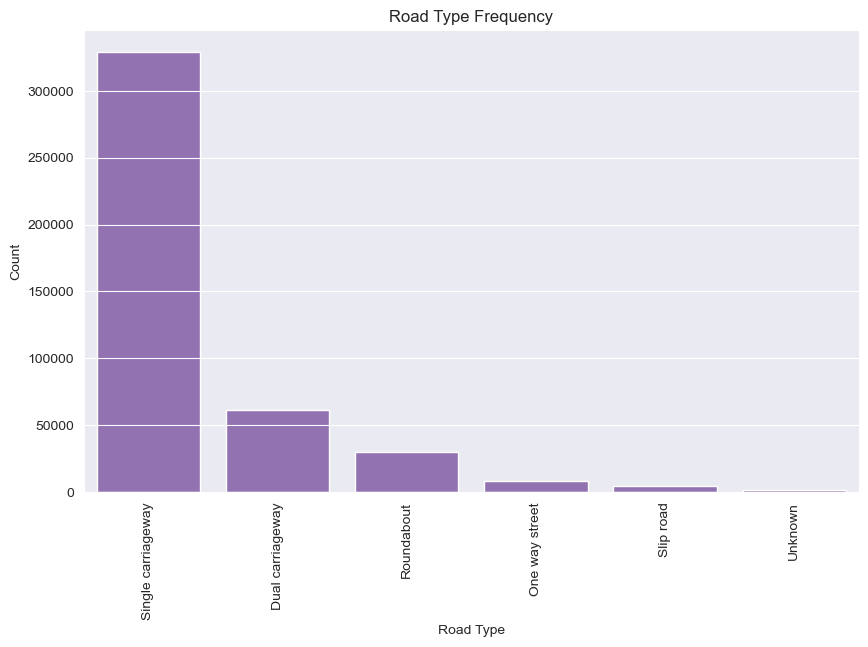

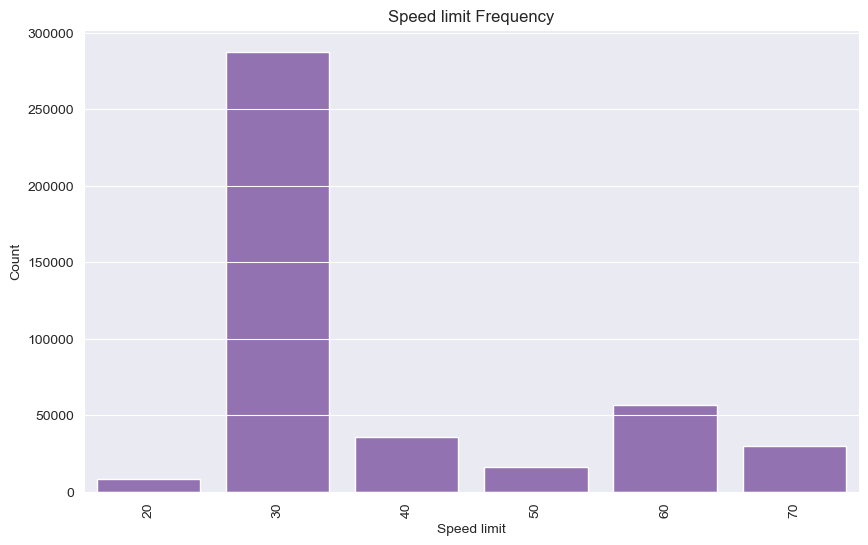

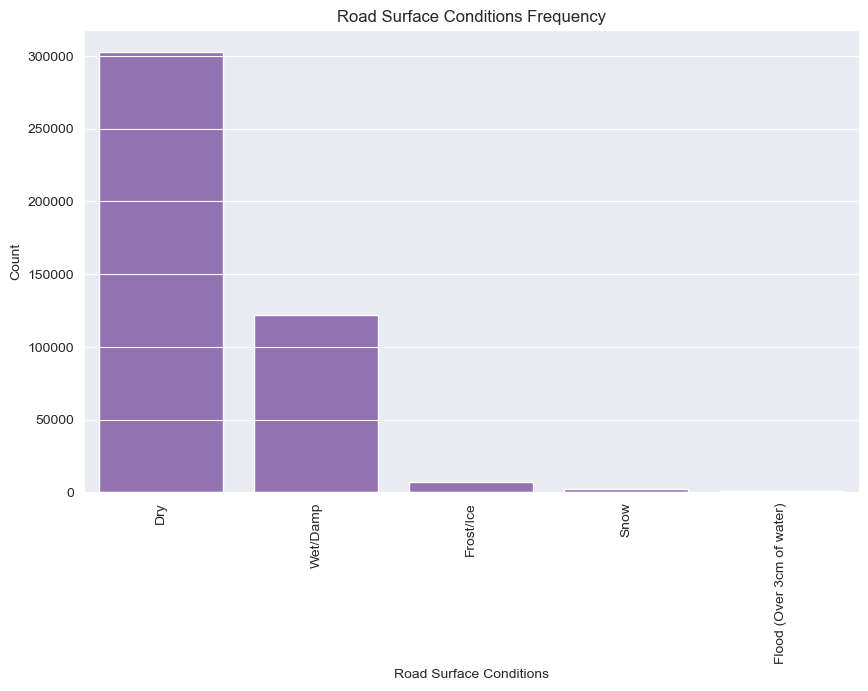

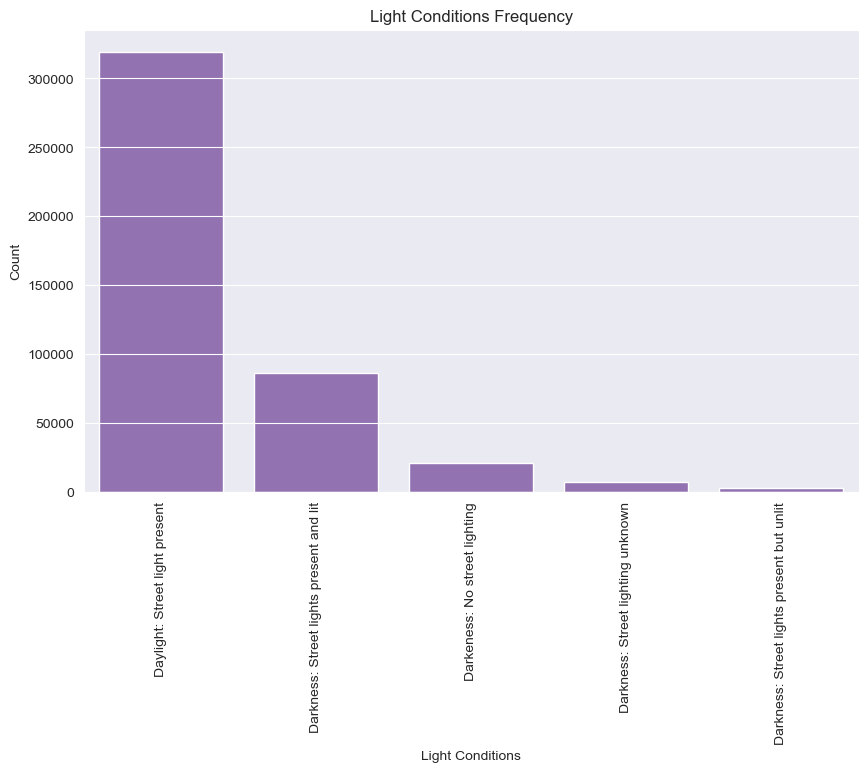

In [38]:
for i in ['Road_Type' , 'Speed_limit' , 'Road_Surface_Conditions' , 'Light_Conditions' ]:
    val = df[i].value_counts()
    plt.figure(figsize= (10,6))
    sns.barplot(x=df[i].value_counts().index, y=df[i].value_counts() , color = sns.color_palette()[4])
    plt.title(" ".join(i.split("_"))+" Frequency")
    plt.xlabel(" ".join(i.split("_")))
    plt.ylabel("Count")
    plt.xticks(rotation = 90)
    print()

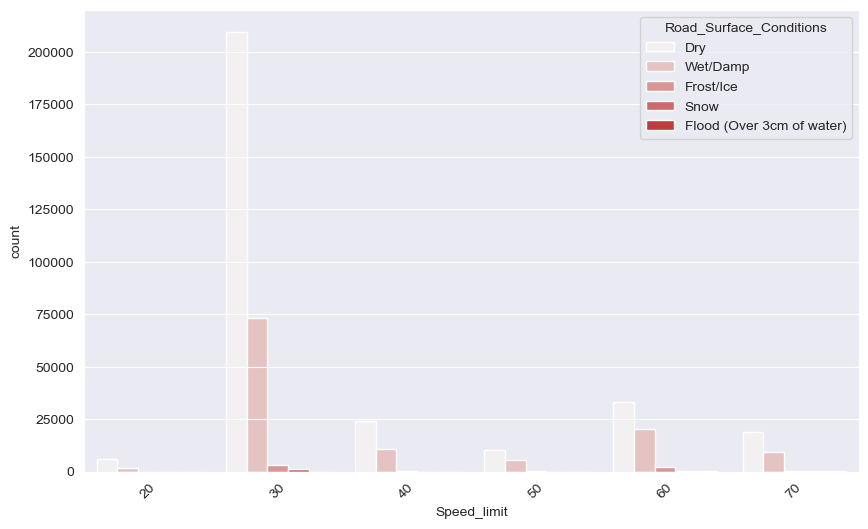

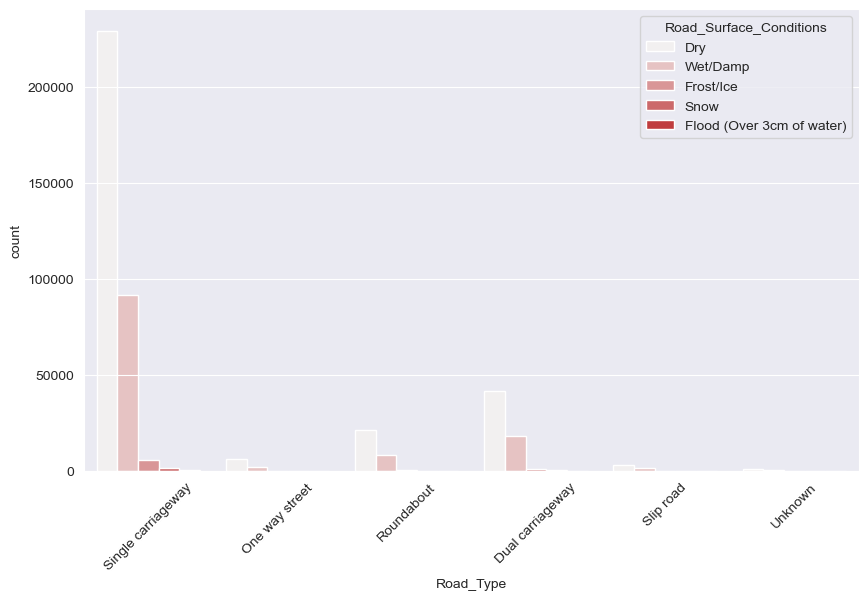

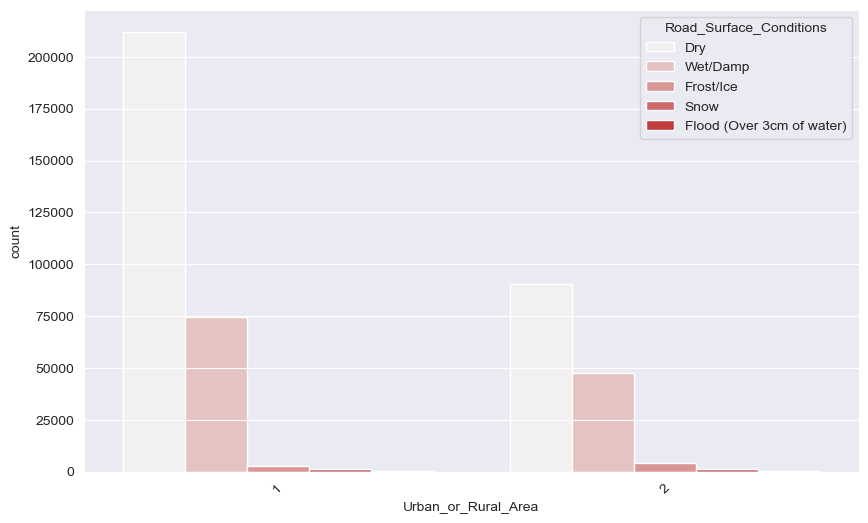

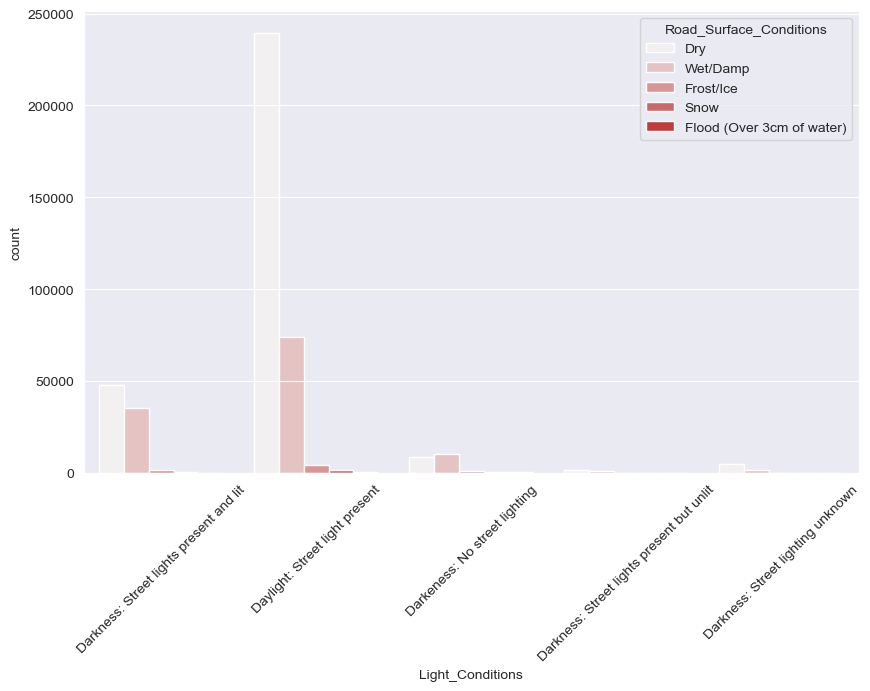

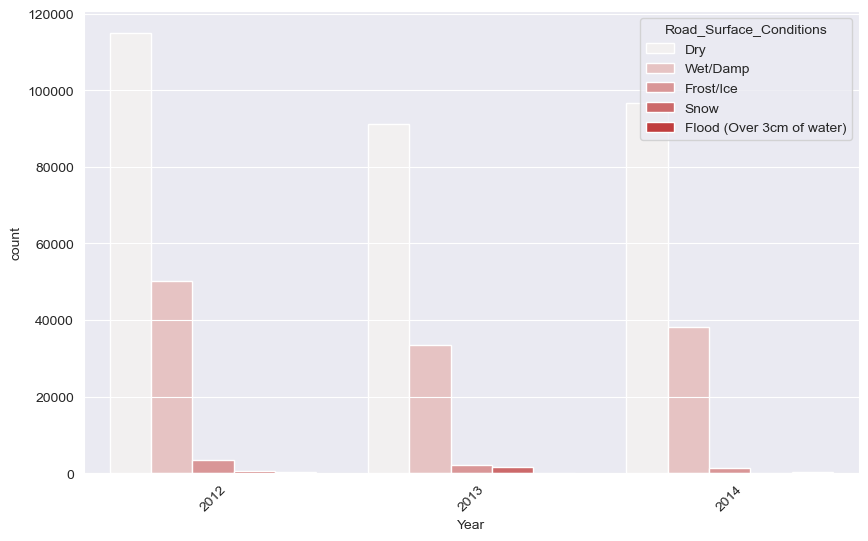

In [39]:
for i in ['Speed_limit', 'Road_Type', 'Urban_or_Rural_Area', 'Light_Conditions' , 'Year']:
    plt.figure(figsize= (10,6))
    sns.countplot(data = df , x=df[i], hue='Road_Surface_Conditions' , color = sns.color_palette()[3])
    plt.xticks(rotation=45)

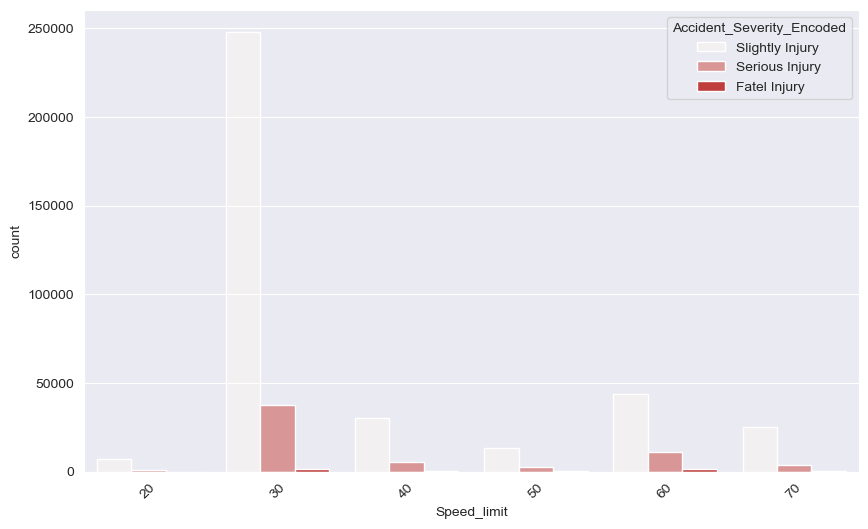

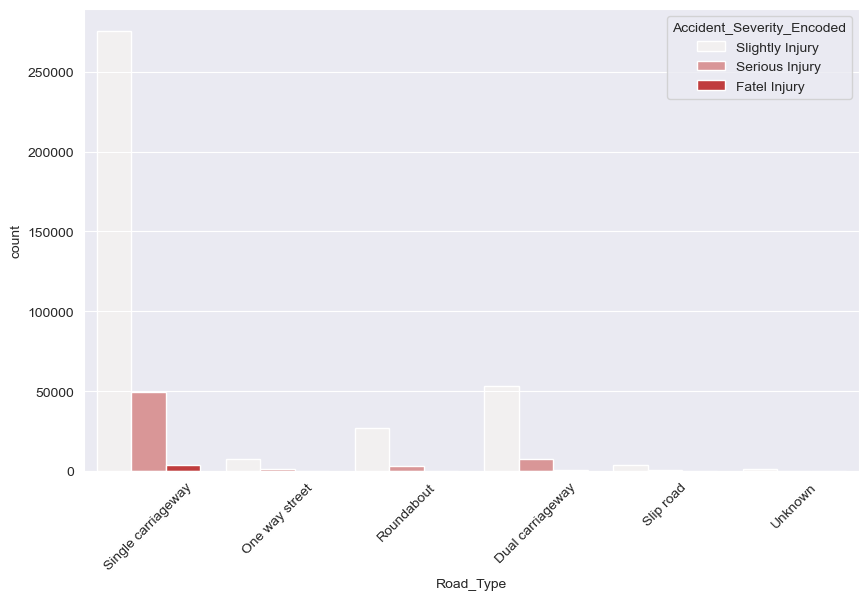

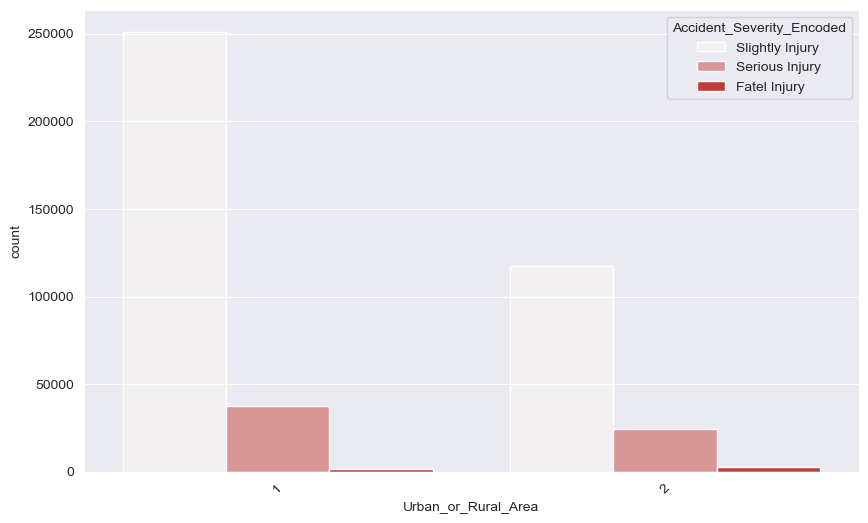

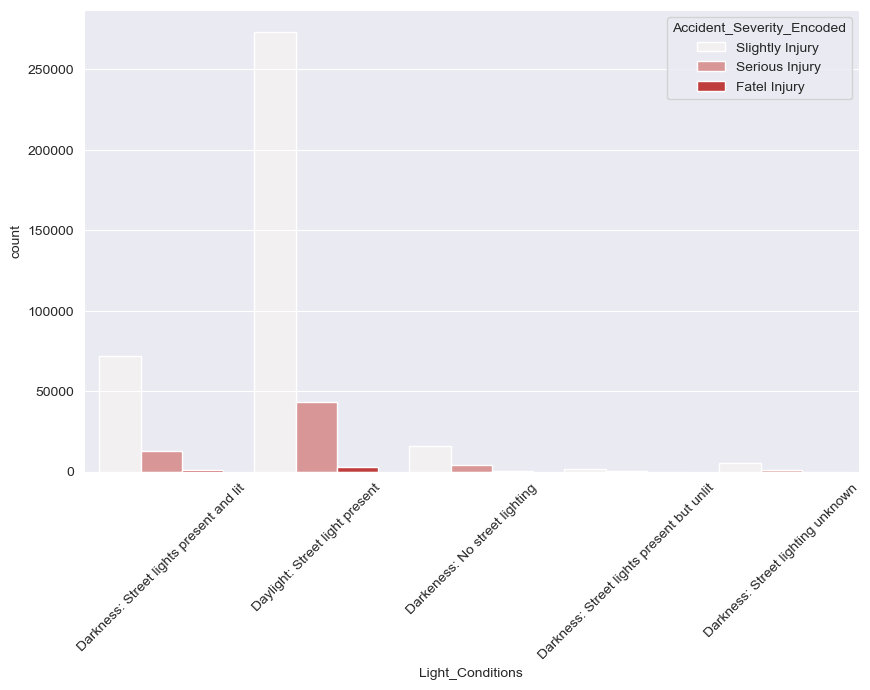

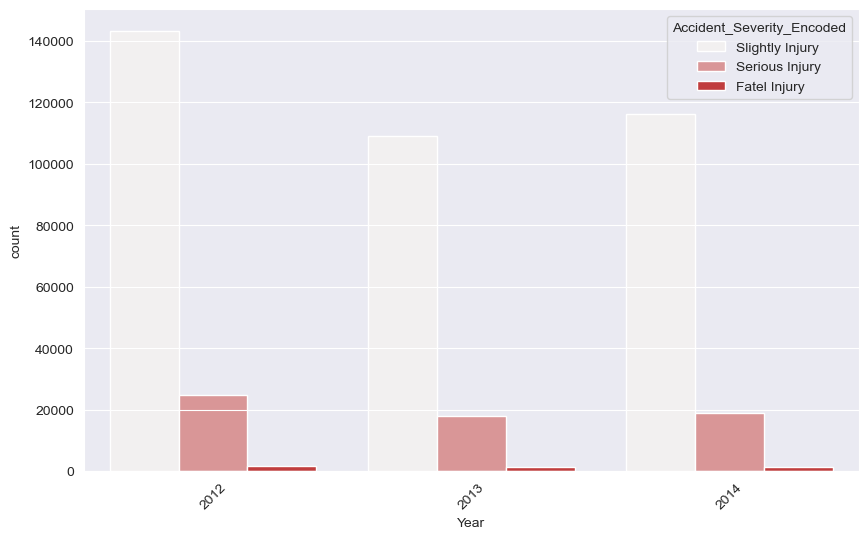

In [40]:
decoding_dict = {3: 'Slightly Injury', 2: 'Serious Injury', 1: 'Fatel Injury'}
df['Accident_Severity_Encoded'] = df['Accident_Severity'].map(decoding_dict)

for i in ['Speed_limit', 'Road_Type', 'Urban_or_Rural_Area', 'Light_Conditions' , 'Year']:
    plt.figure(figsize= (10,6))
    sns.countplot(data = df , x=i, hue='Accident_Severity_Encoded' , color = sns.color_palette()[3])
    plt.xticks(rotation=45)
    plt.show()
    
df.drop(['Accident_Severity_Encoded'], axis=1, inplace=True)


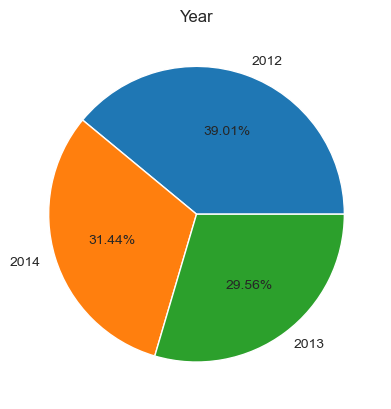

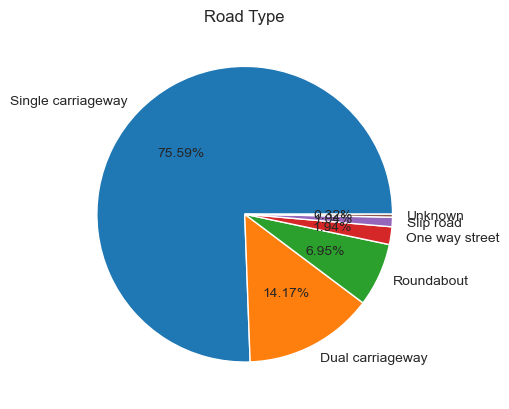

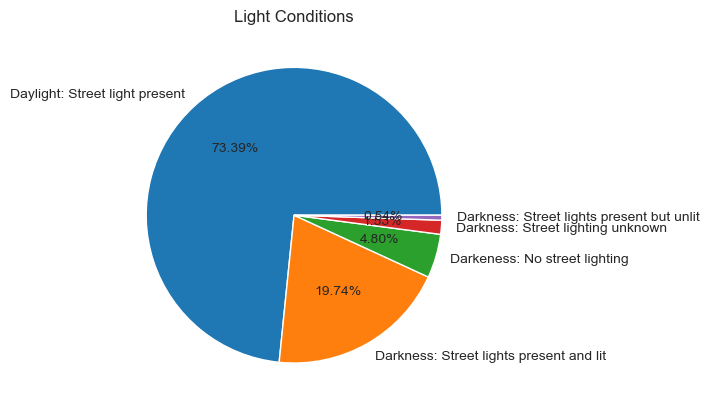

In [41]:
for i in ['Year'  , 'Road_Type' , 'Light_Conditions' ]:
  value = df[i].value_counts()
  plt.pie(
      value ,
      labels = value.index,
      autopct='%1.2f%%',
  )
  plt.title(" ".join(i.split("_")))
  plt.show()

  print()



In [42]:
numerical_columns = df.select_dtypes(exclude=['object']).columns
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

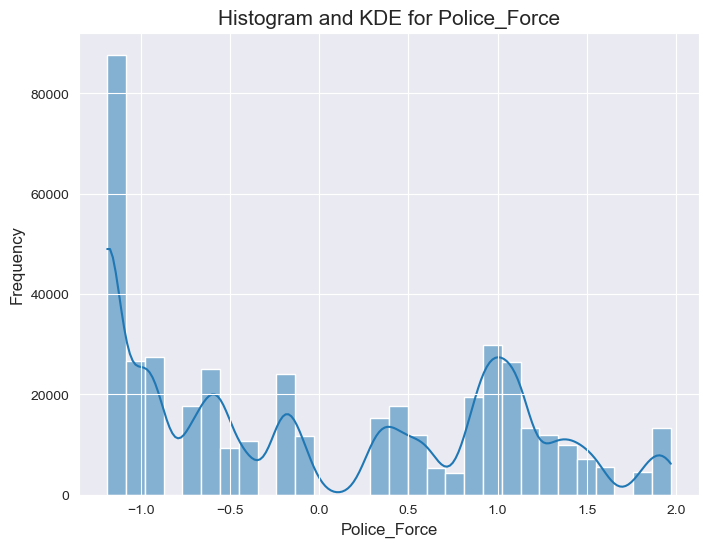

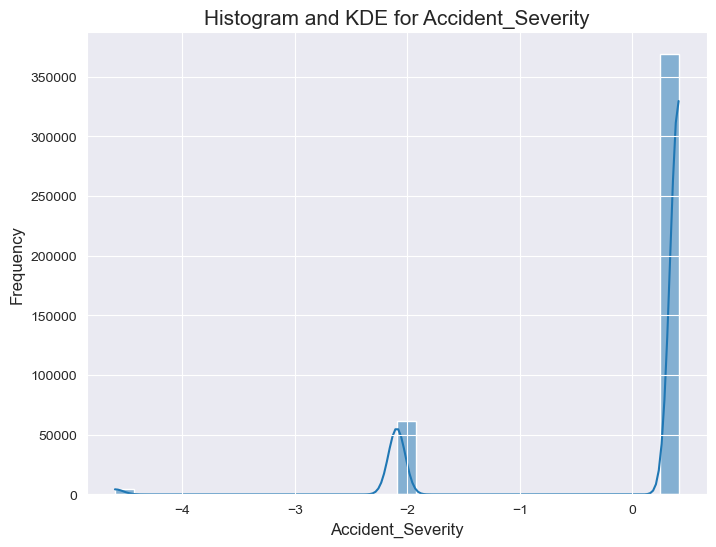

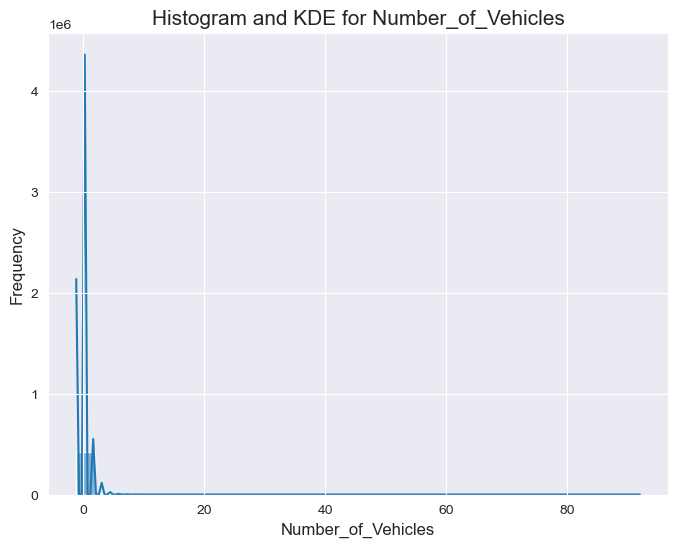

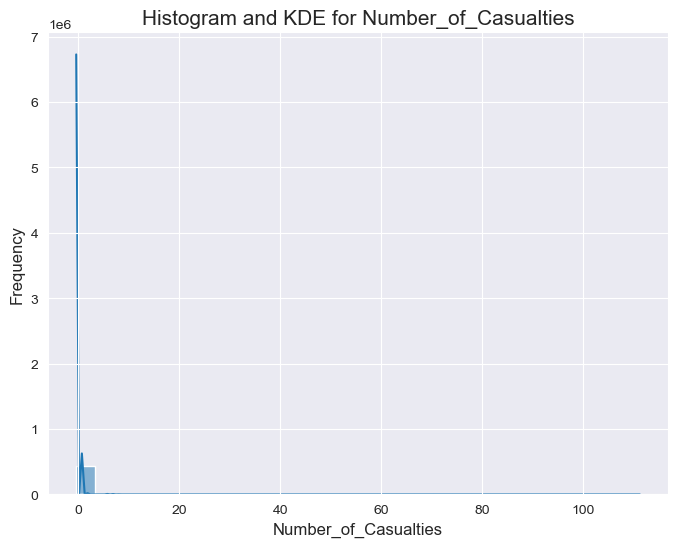

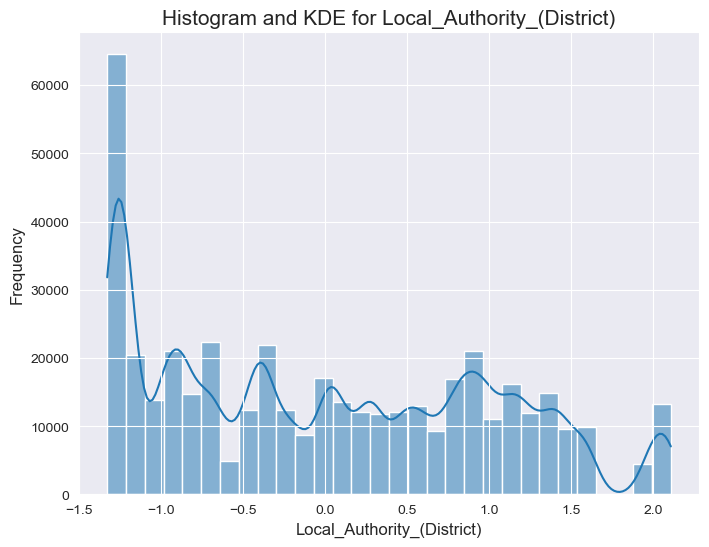

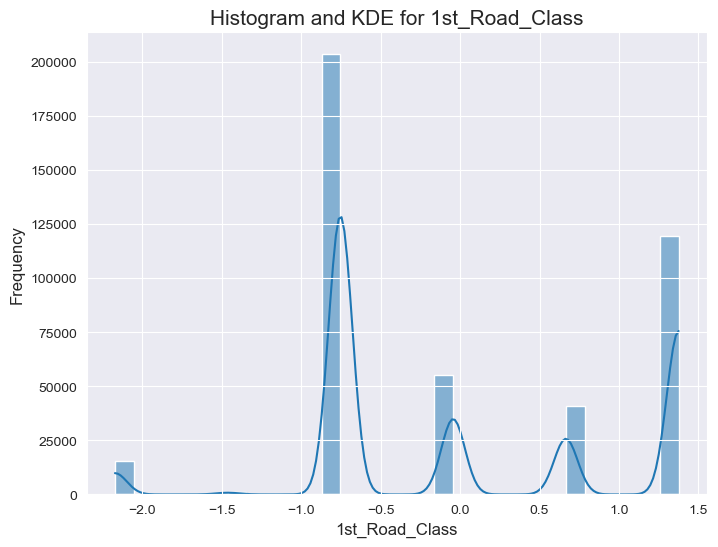

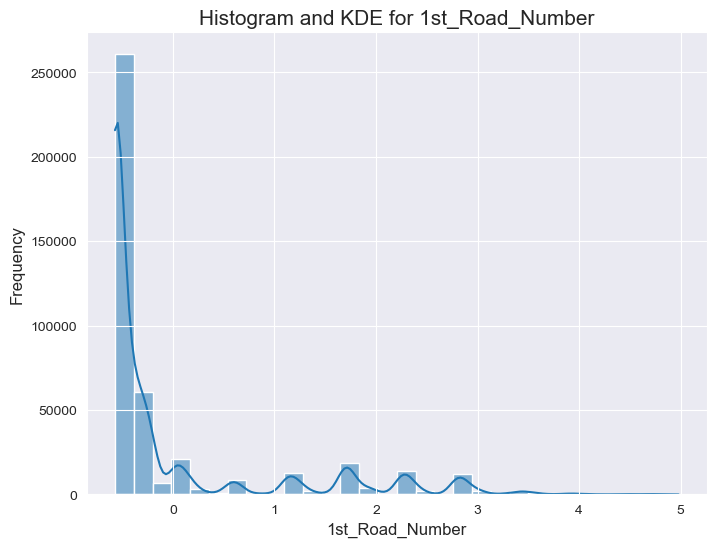

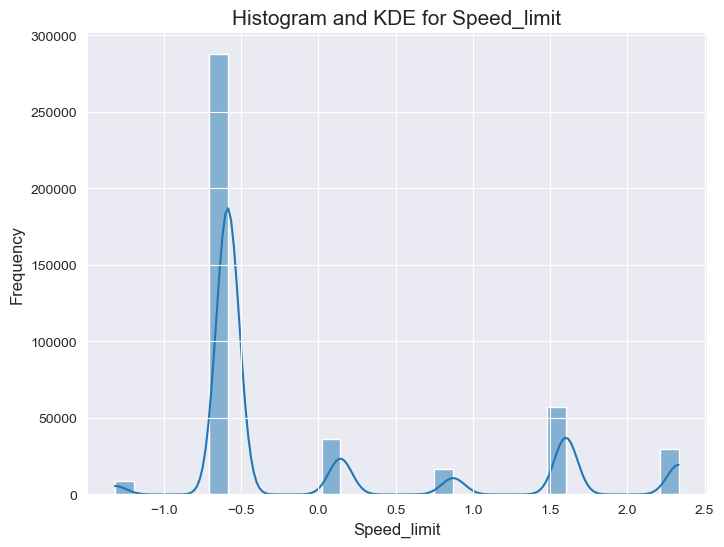

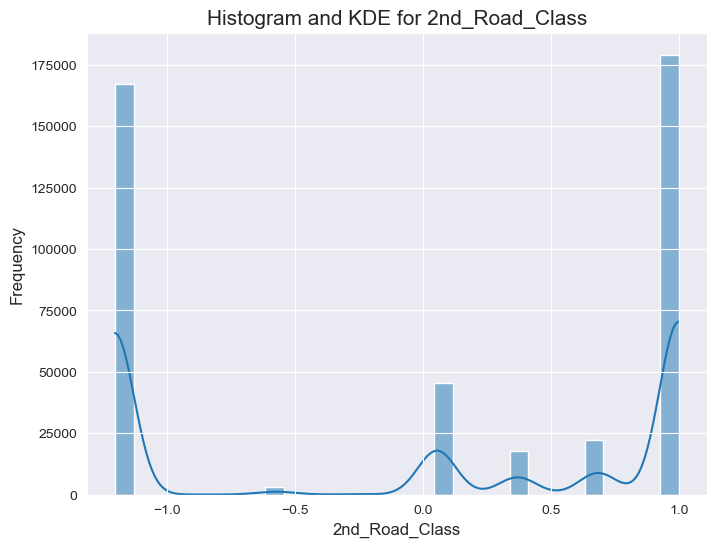

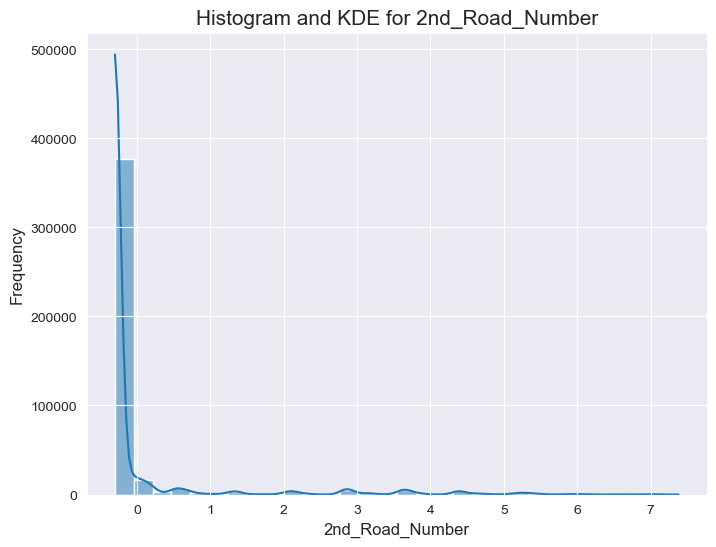

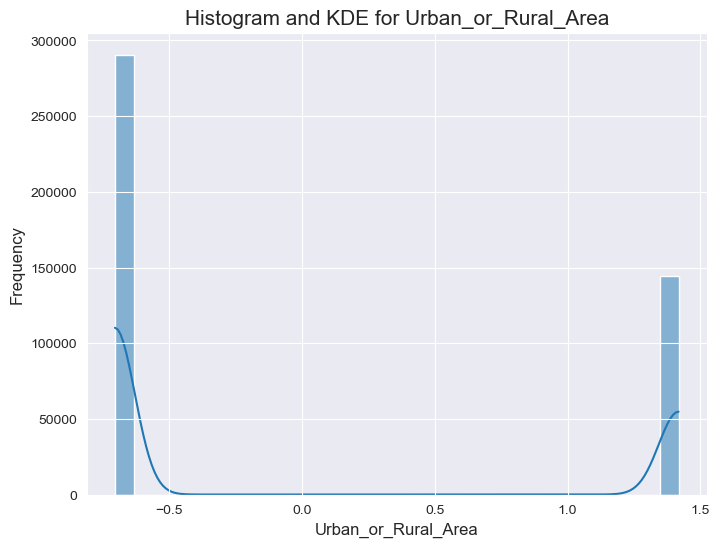

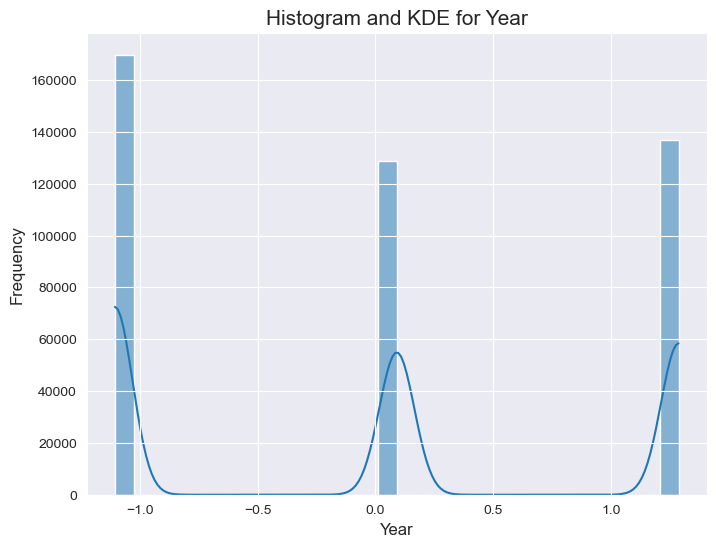

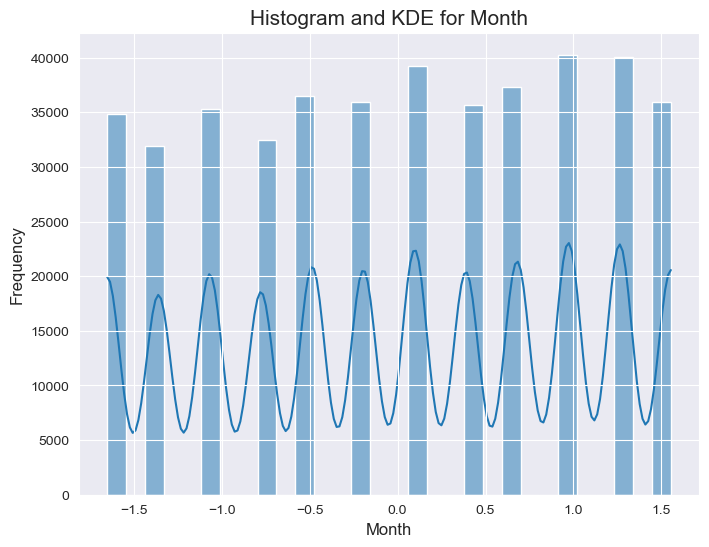

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

for idx, i in enumerate(df.select_dtypes(exclude=['object']).columns):
    if i not in ['Location_Easting_OSGR','Location_Northing_OSGR','Longitude','Latitude','Day_of_Week']:
        plt.figure(figsize=(8, 6))
        sns.histplot(df[i], kde=True, bins=30)

        plt.title(f'Histogram and KDE for {i}', fontsize=15)
        plt.xlabel(i, fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.show()


<Axes: >

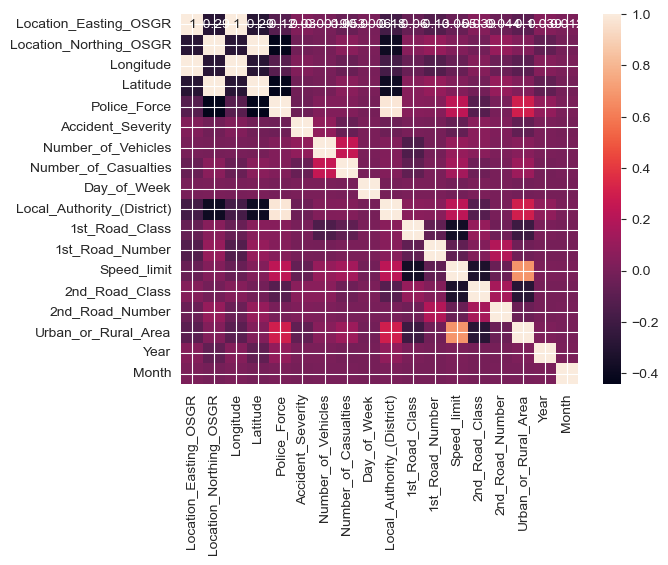

In [44]:
import seaborn as sns

corr_matrix = df.select_dtypes(exclude=['object']).corr()

sns.heatmap(corr_matrix, annot=True)

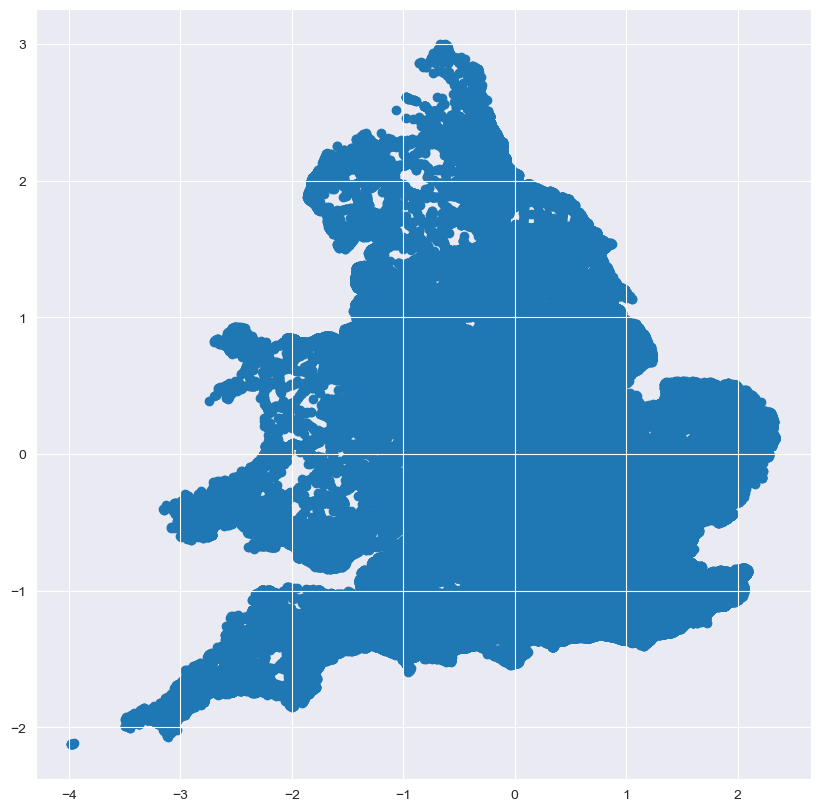

In [45]:
plt.figure(figsize=(10,10))
plt.scatter(df['Longitude'], df['Latitude'])
plt.show()

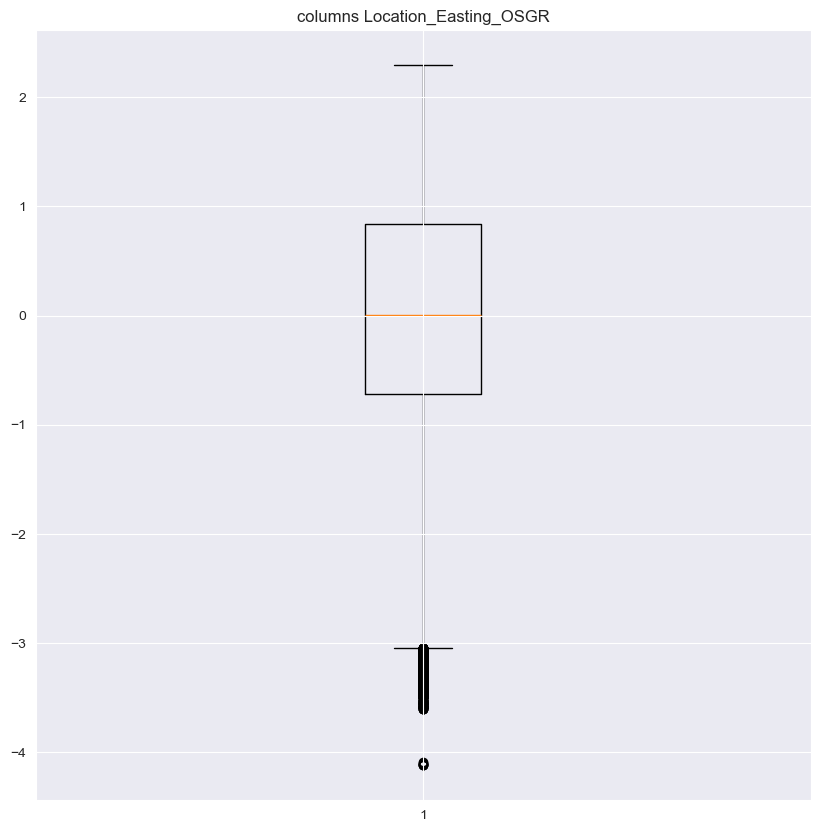

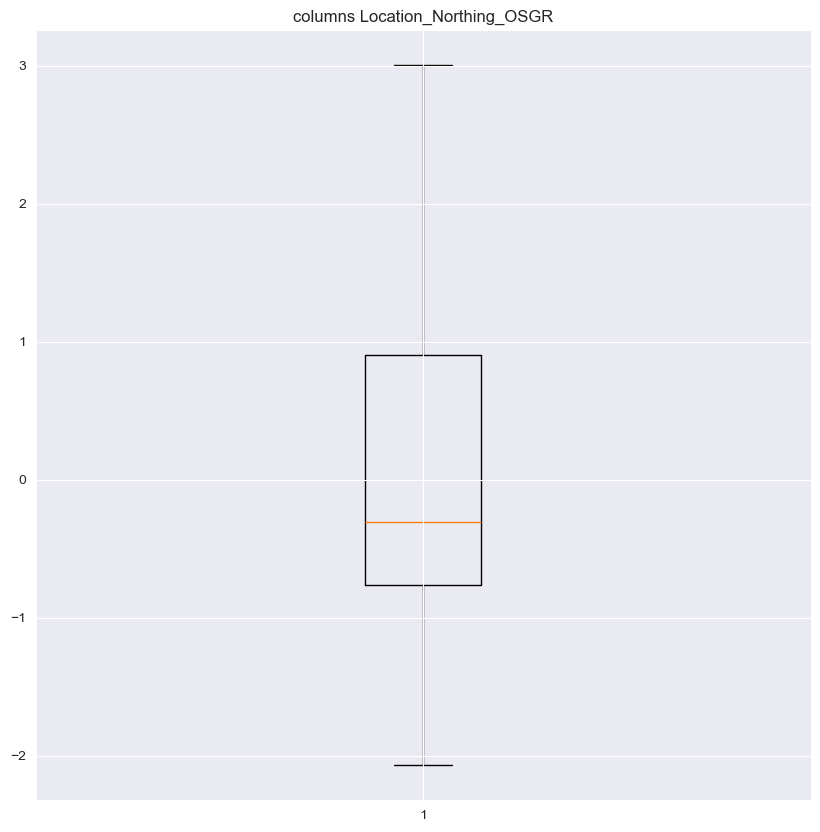

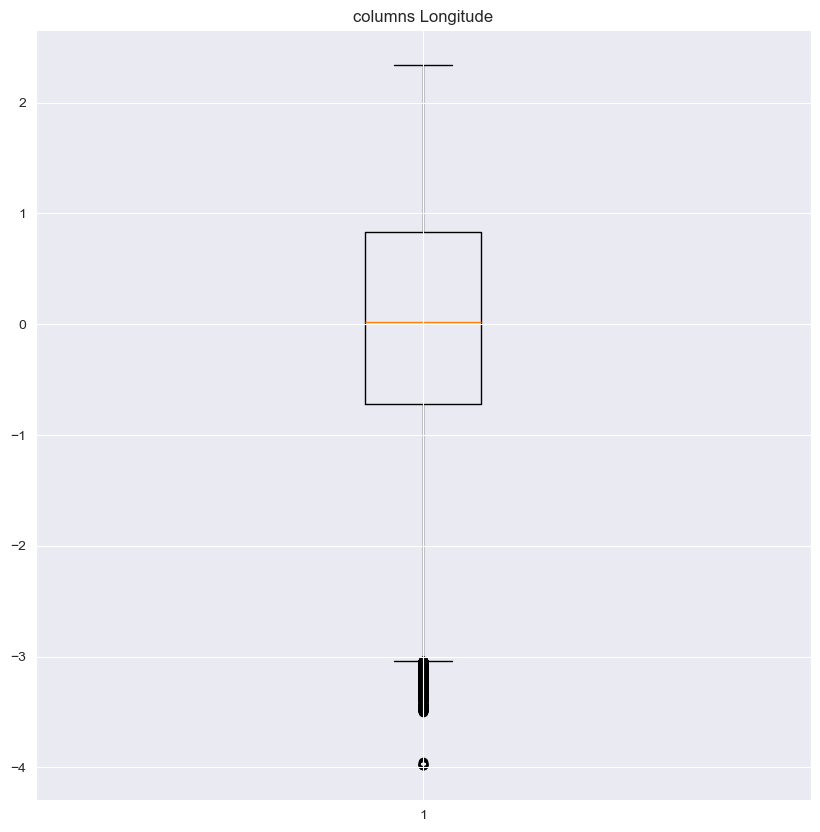

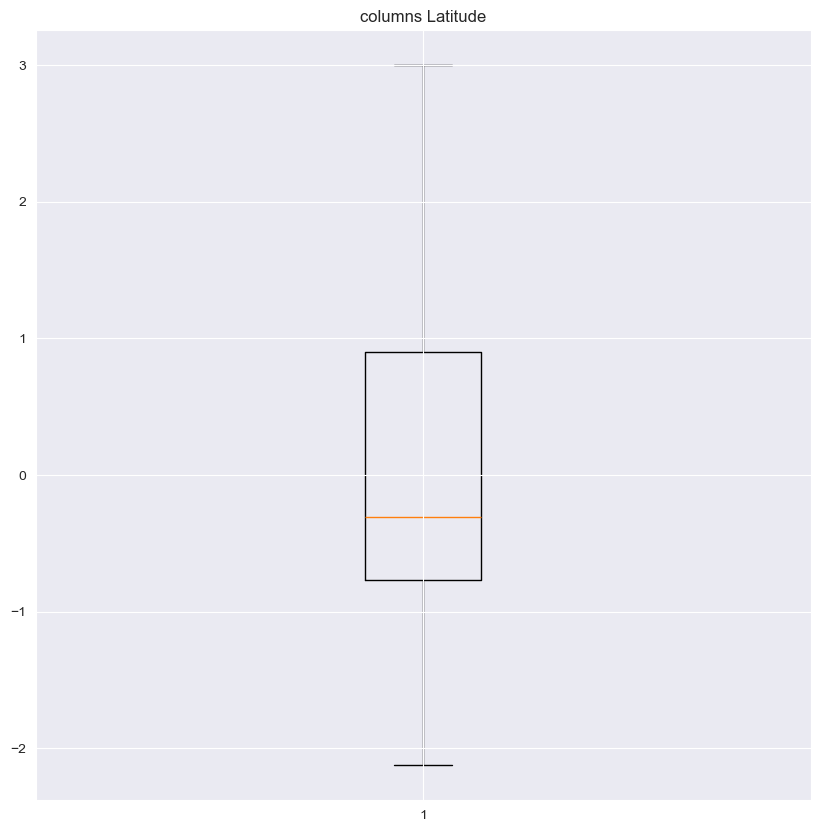

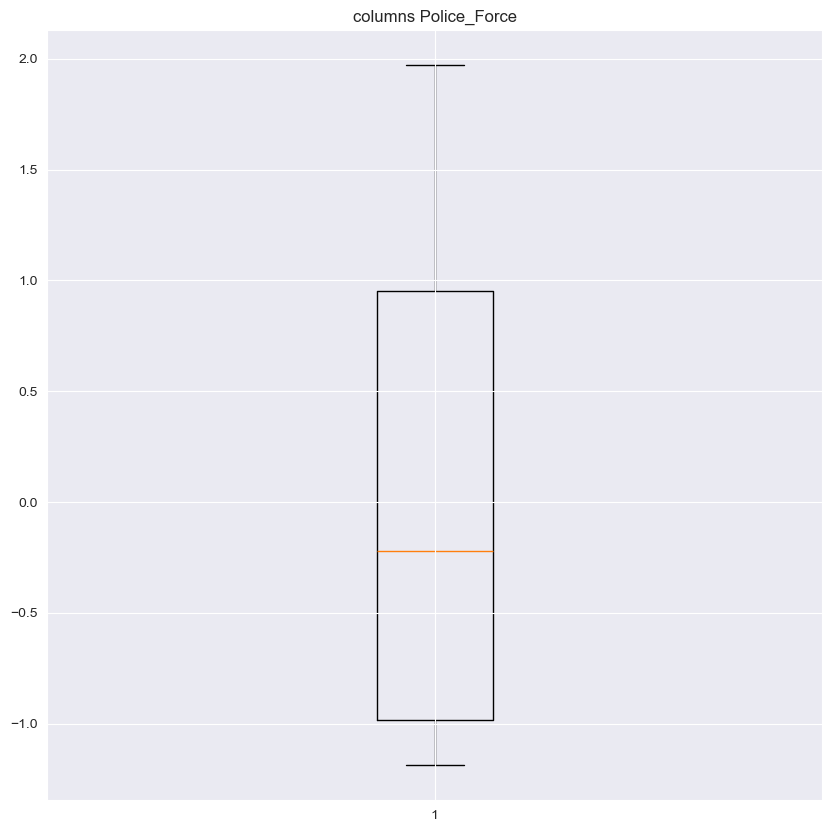

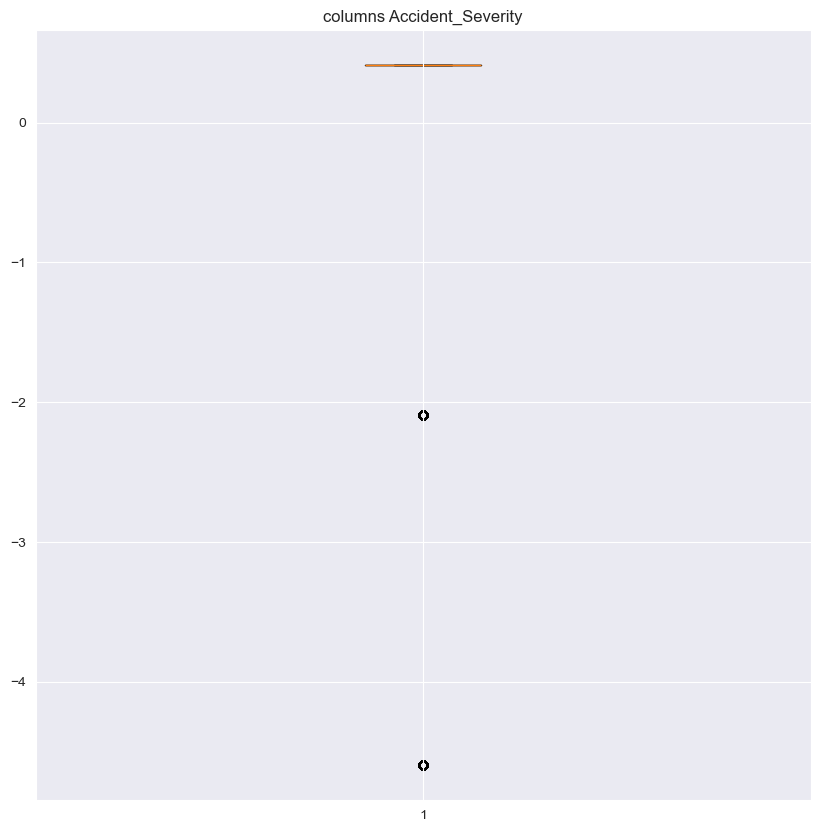

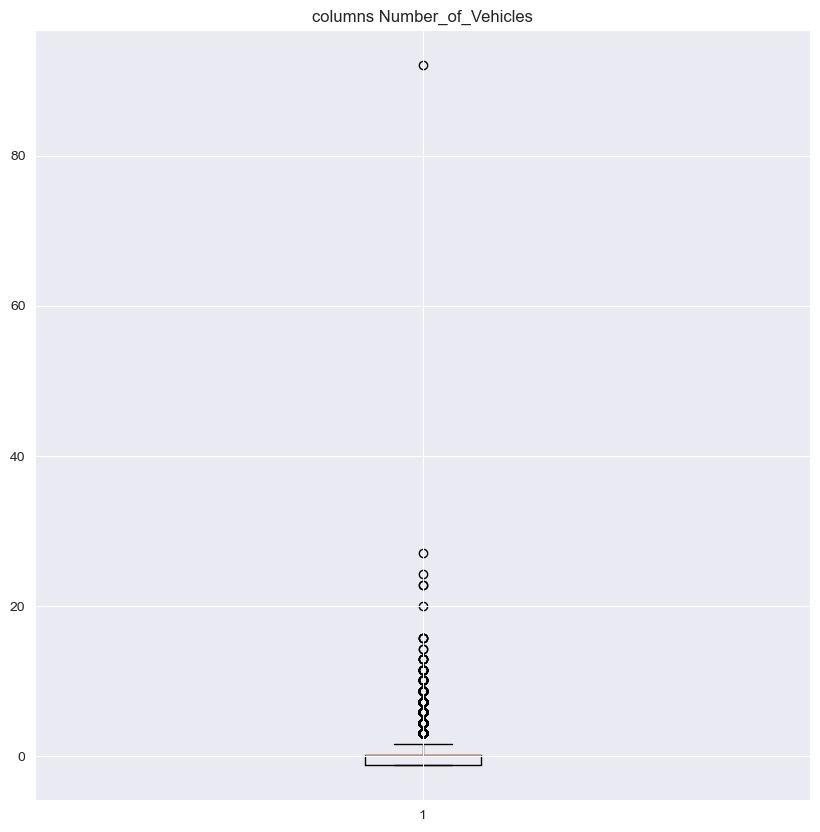

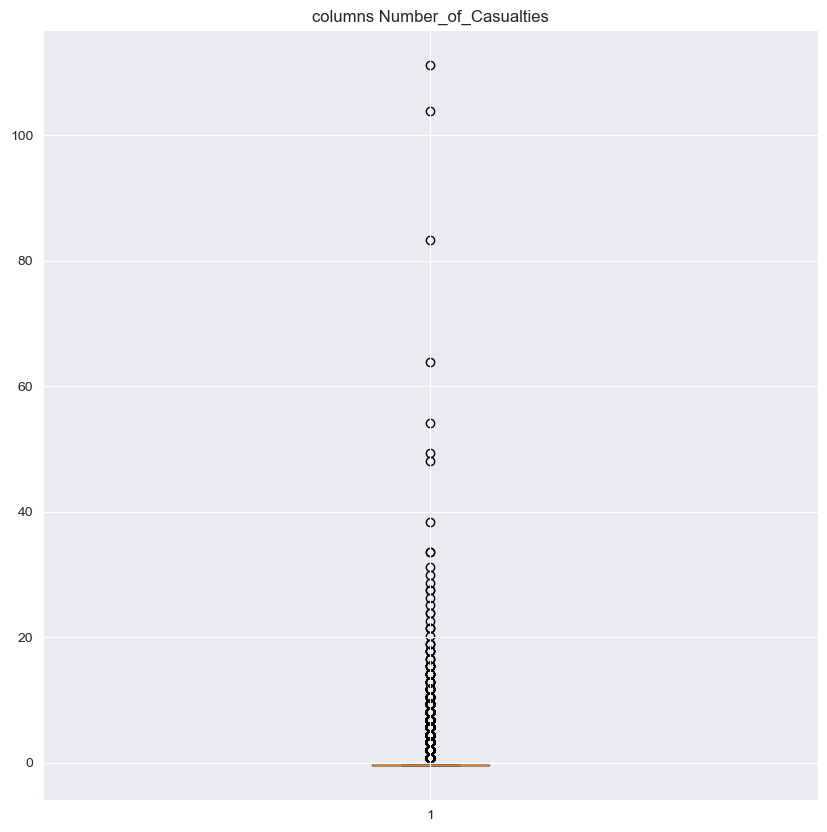

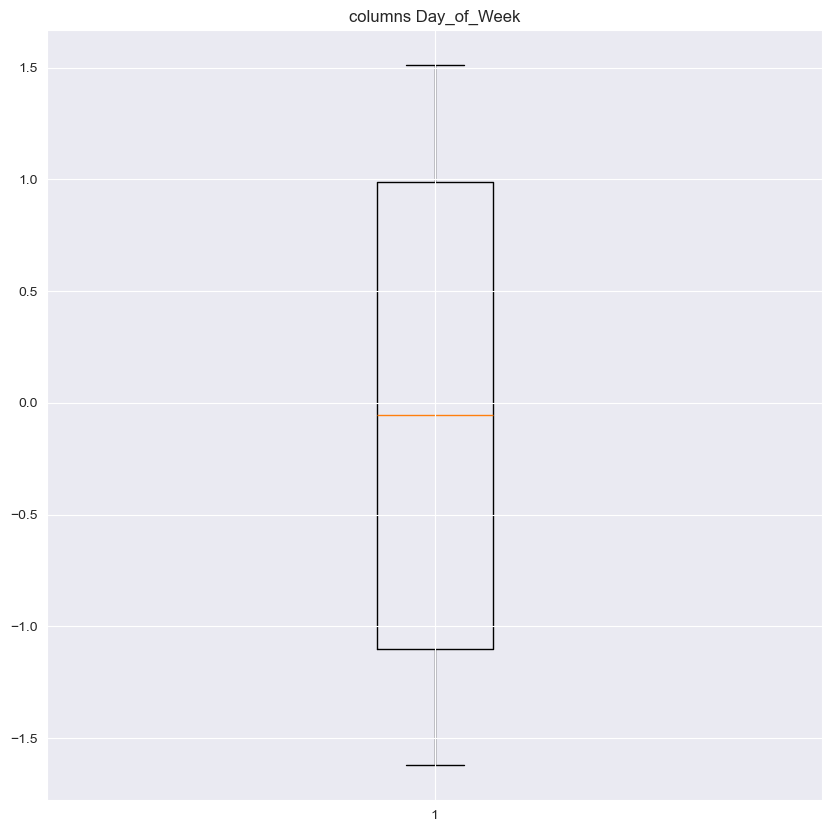

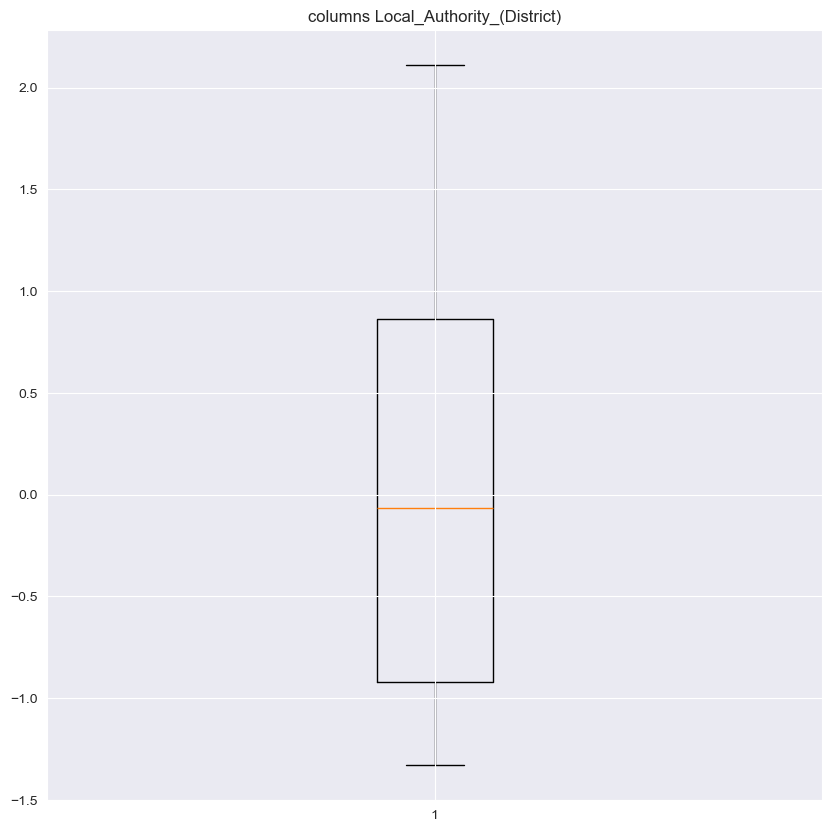

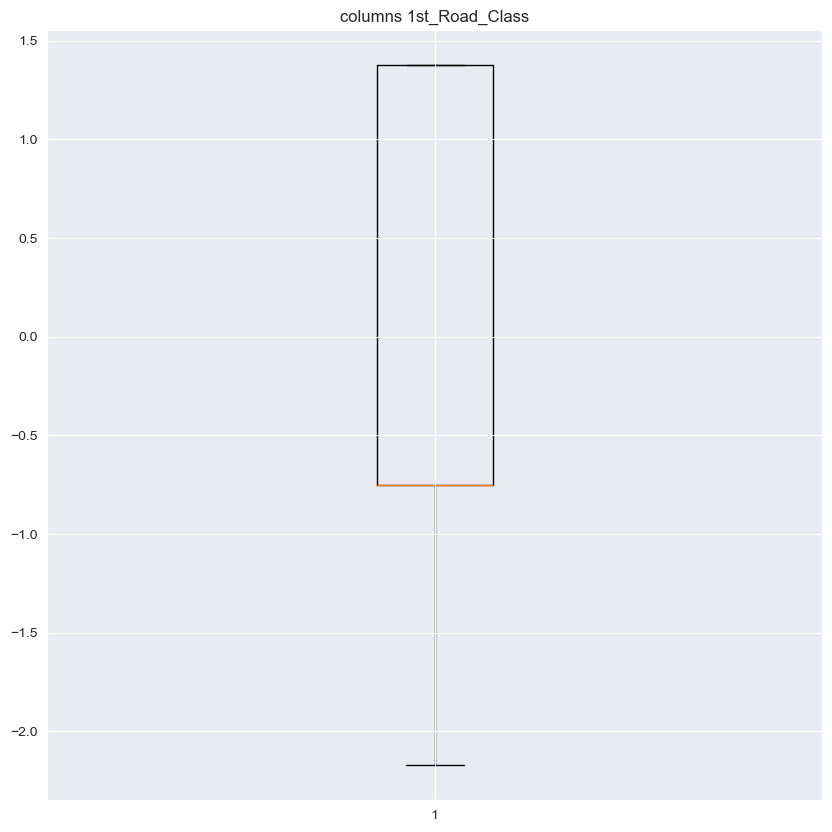

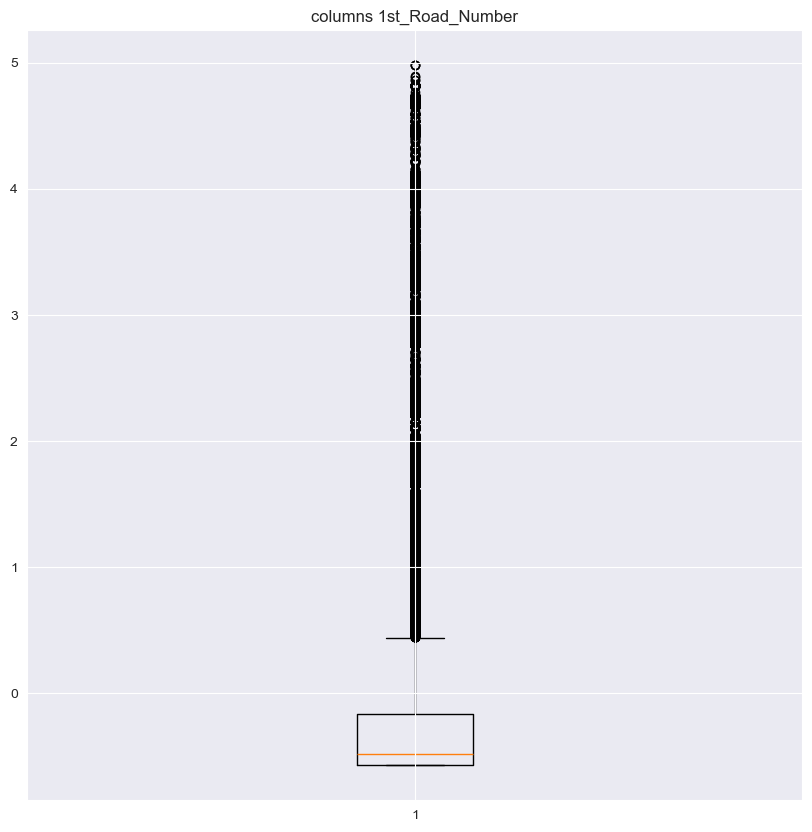

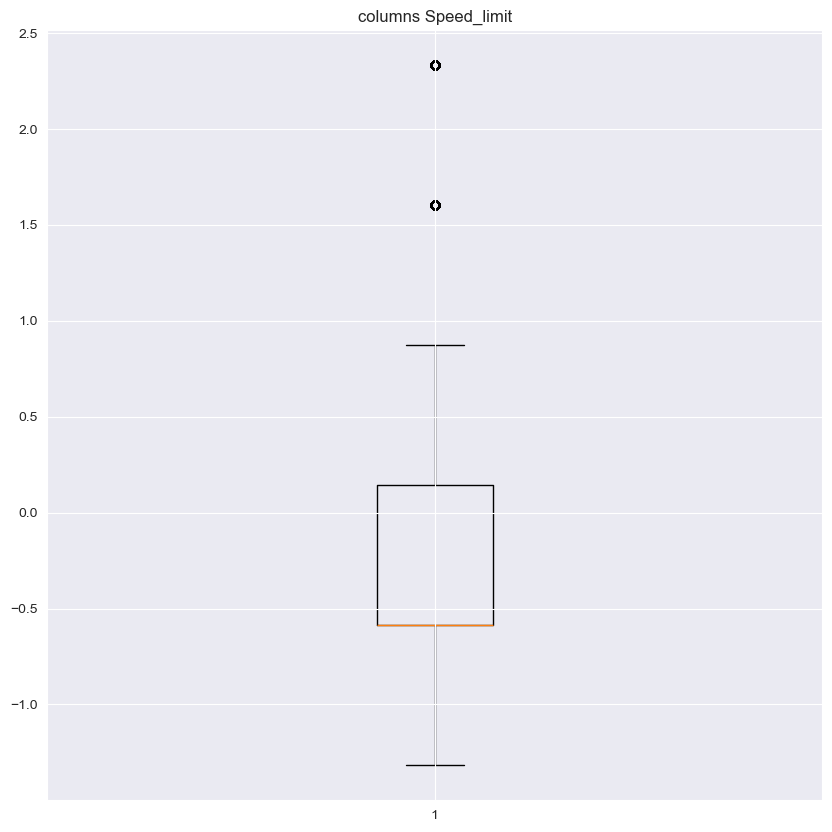

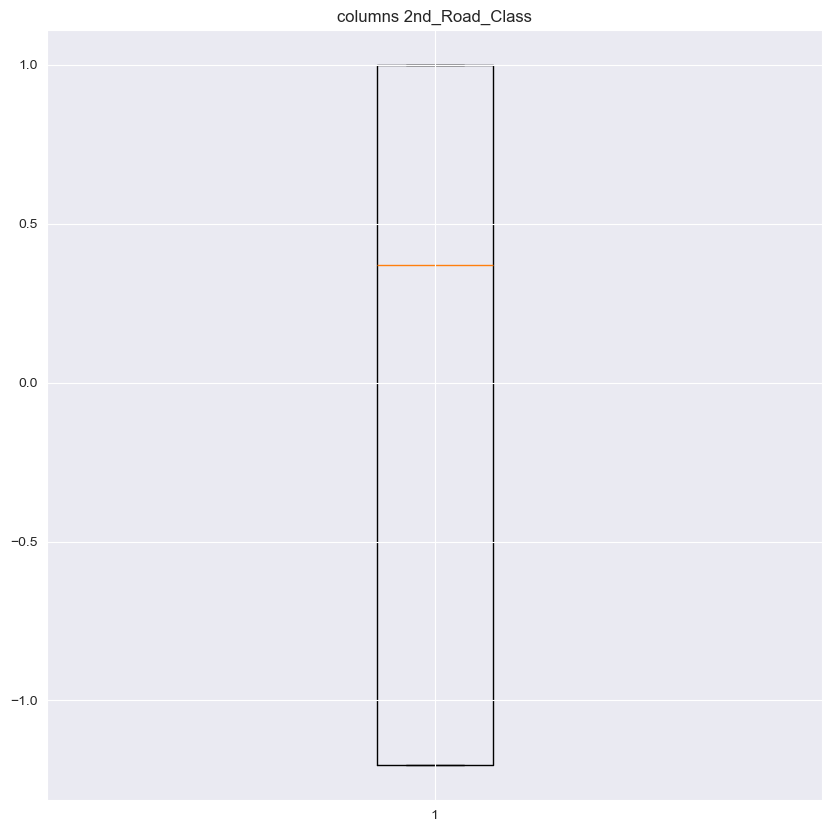

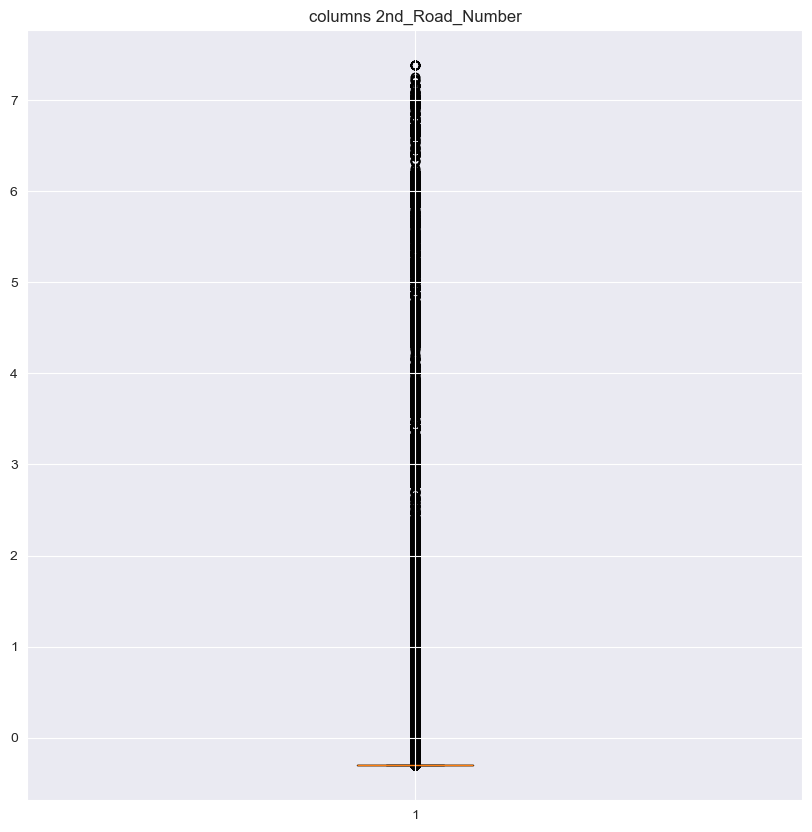

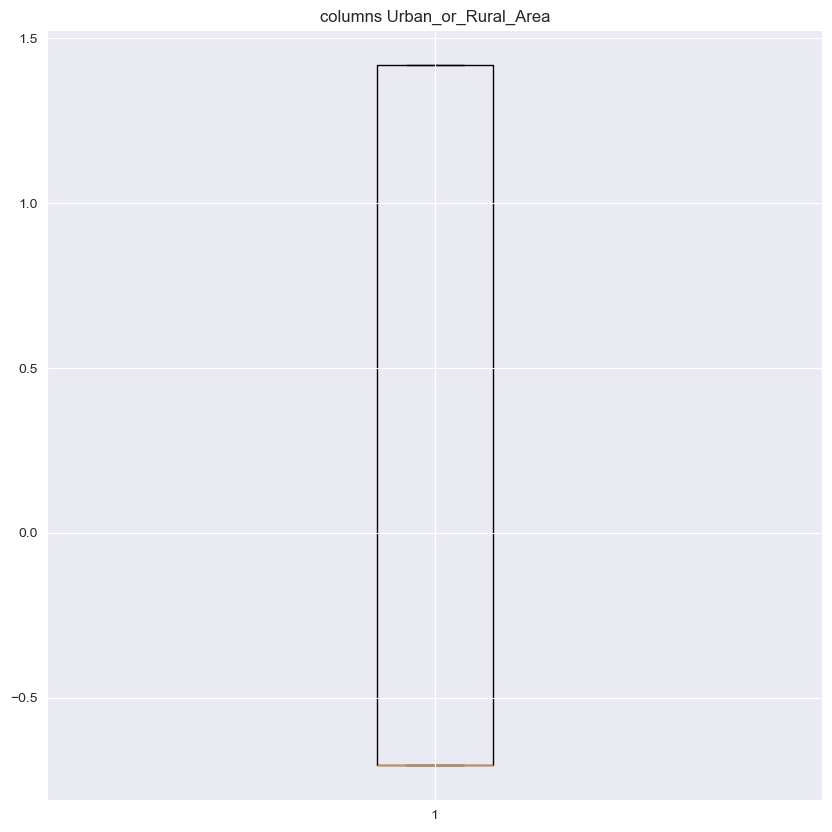

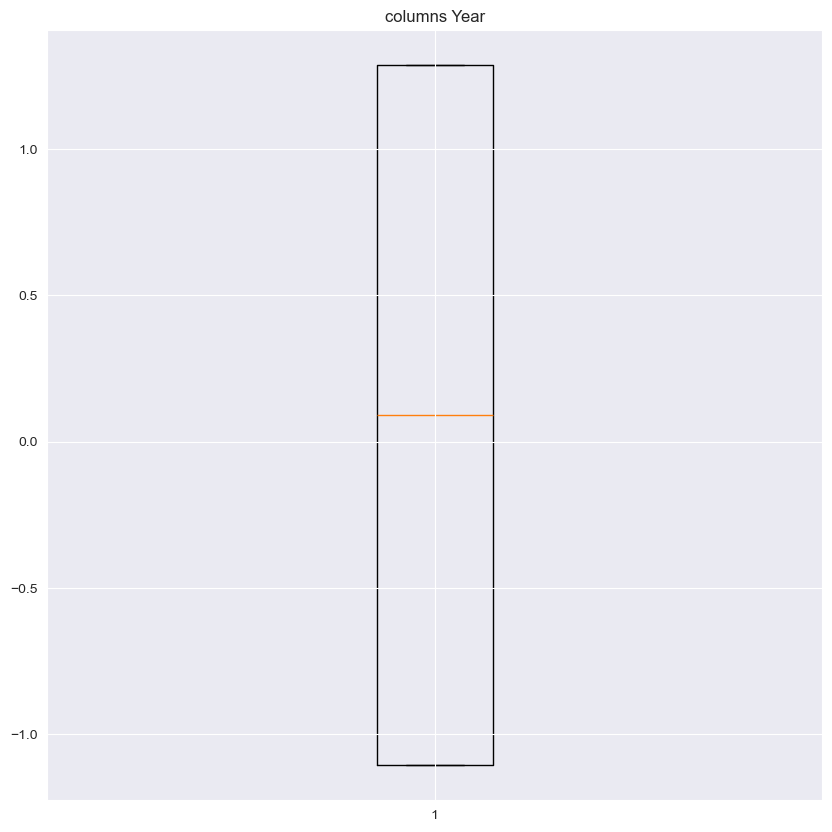

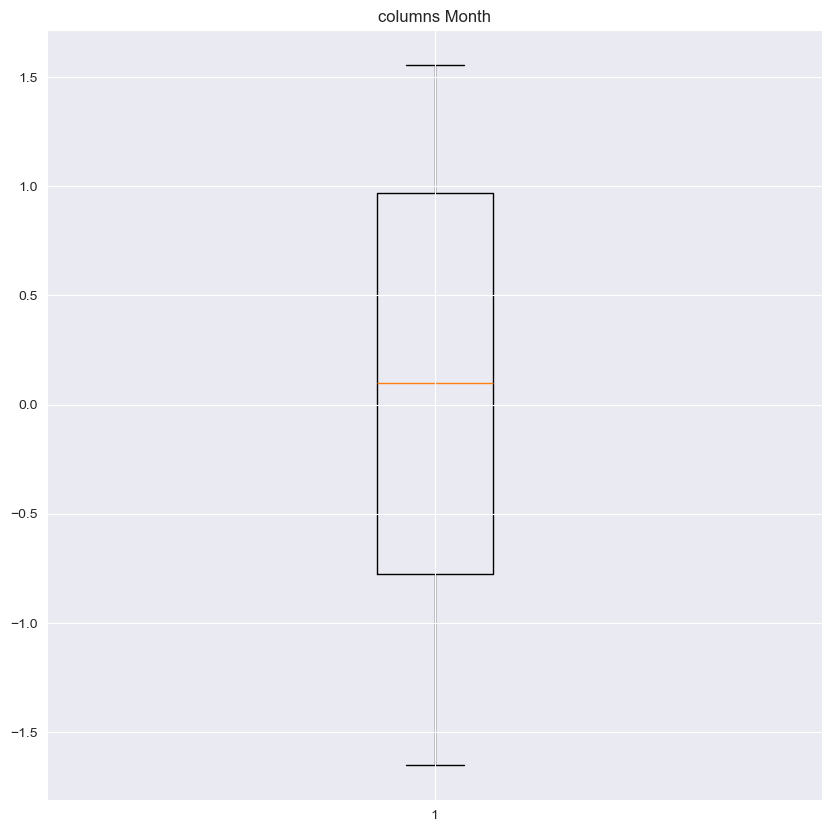

In [46]:
for i in df.select_dtypes(exclude=['object']).columns:
    plt.figure(figsize=(10,10))
    plt.boxplot(df[i])
    plt.title(f'columns {i}')
    plt.show()

## Modeling

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [48]:
if len(df) >= 1000:
    df_sampled = df.sample(n=1000, random_state=0)

In [49]:
le = LabelEncoder()
for i in df_sampled.select_dtypes(include='object').columns:
    df_sampled[i] = le.fit_transform(df_sampled[i])

X = df_sampled.drop(columns=['Road_Type','Accident_Index','Date','Time','LSOA_of_Accident_Location'], axis=1)
y = df_sampled['Road_Type']

numeric_features = ['Local_Authority_(Highway)', 'Road_Surface_Conditions', 
                    'Did_Police_Officer_Attend_Scene_of_Accident','Light_Conditions','Pedestrian_Crossing-Physical_Facilities',
                    'Pedestrian_Crossing-Human_Control','Weather_Conditions']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_features = ['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', 'Latitude', 
                        'Police_Force', 'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties', 
                        'Day_of_Week', 'Local_Authority_(District)', '1st_Road_Class', '1st_Road_Number', 
                        'Speed_limit', '2nd_Road_Class', '2nd_Road_Number', 'Urban_or_Rural_Area', 'Month','Year']


# Preprocessor for categorical features
categorical_transformer = Pipeline(steps=[
    ('label_encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combining both preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [50]:
LR_model = Pipeline(
    steps=[
        ('processor' , preprocessor),
        ('Classifier' , LogisticRegression())]
)

LR_model.fit(X_train,y_train)
LR_y_pred = LR_model.predict(X_test)

In [51]:
DTC_model = Pipeline(
    steps=[
        ('processor' , preprocessor),
        ('Classifier' , DecisionTreeClassifier())]
)

DTC_model.fit(X_train,y_train)
DTC_y_pred = DTC_model.predict(X_test)

In [52]:
SVC_model = Pipeline(
    steps=[
        ('processor' , preprocessor),
        ('Classifier' , SVC()) #change model here
           ]
)

SVC_model.fit(X_train,y_train)
SVC_y_pred = SVC_model.predict(X_test)

In [53]:
KNN_model = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", KNeighborsClassifier(n_neighbors=9))]
)

KNN_model.fit(X_train,y_train)
KNN_y_pred = KNN_model.predict(X_test)

This is the model LogisticRegression
Confusion Matrix [[ 13   0   1  12   0   0]
 [  0   0   0   2   0   0]
 [  0   0   1  11   0   0]
 [  1   0   0 155   0   0]
 [  0   0   1   0   0   0]
 [  0   0   0   3   0   0]]
Accuracy Score 0.845
Recall Score 0.845
F1 Score 0.845
Precision Score 0.845


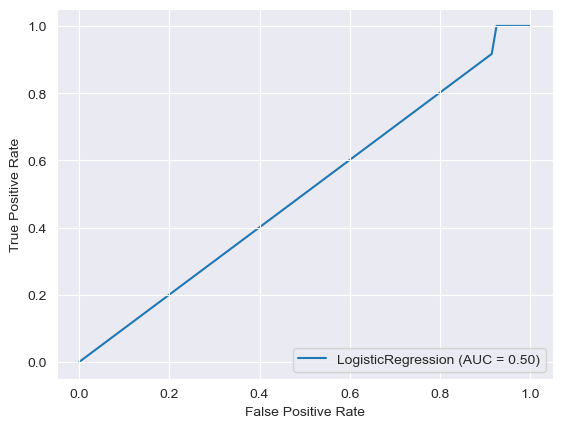




This is the model DecisionTreeClassifier
Confusion Matrix [[ 11   2   2  11   0   0]
 [  0   0   1   1   0   0]
 [  0   0   1  11   0   0]
 [  7   2   7 139   1   0]
 [  0   0   0   1   0   0]
 [  0   0   0   3   0   0]]
Accuracy Score 0.755
Recall Score 0.755
F1 Score 0.755
Precision Score 0.755


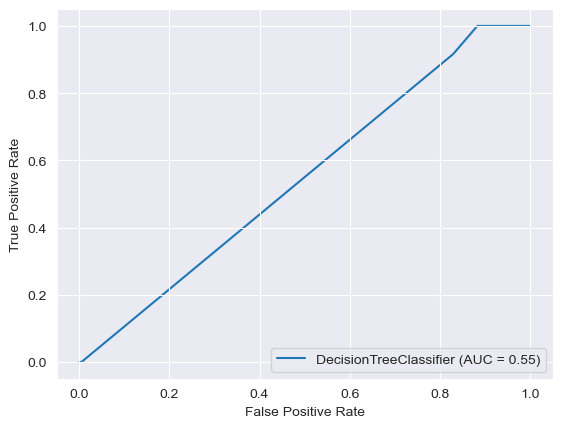




This is the model SVC
Confusion Matrix [[  8   0   0  18   0   0]
 [  0   0   0   2   0   0]
 [  0   0   0  12   0   0]
 [  0   0   0 156   0   0]
 [  0   0   0   1   0   0]
 [  0   0   0   3   0   0]]
Accuracy Score 0.82
Recall Score 0.82
F1 Score 0.82
Precision Score 0.82


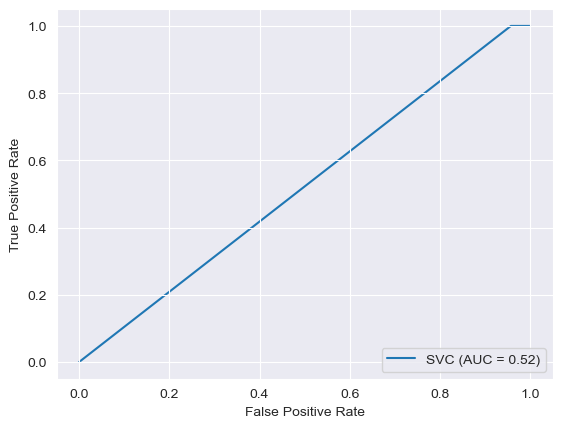




This is the model KNeighborsClassifier
Confusion Matrix [[  6   0   0  20   0   0]
 [  0   0   0   2   0   0]
 [  0   0   0  12   0   0]
 [  3   0   0 153   0   0]
 [  0   0   0   1   0   0]
 [  0   0   0   3   0   0]]
Accuracy Score 0.795
Recall Score 0.795
F1 Score 0.795
Precision Score 0.795


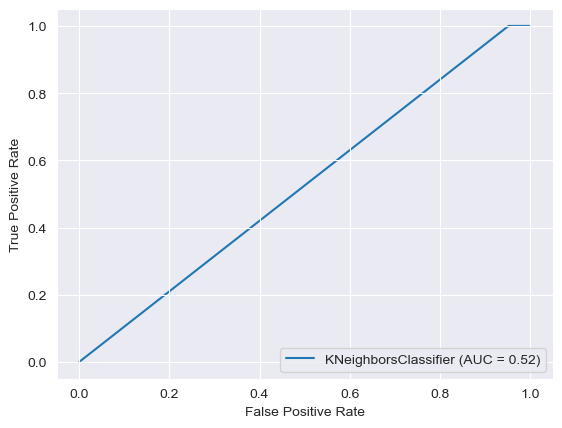

In [54]:
models_prediction = [LR_y_pred,DTC_y_pred,SVC_y_pred,KNN_y_pred]
models_name = ['LogisticRegression','DecisionTreeClassifier','SVC','KNeighborsClassifier']

le = LabelEncoder()
fitted_y_test = le.fit_transform(y_test)

for i in range(4):
    fitted_prediction= le.fit_transform(models_prediction[i])
    print(f"This is the model {models_name[i]}")
    print(f"Confusion Matrix {confusion_matrix(y_test,models_prediction[i])}")
    print(f"Accuracy Score {accuracy_score(y_test,models_prediction[i])}")
    print(f"Recall Score {recall_score(y_test,models_prediction[i],average='micro')}")
    print(f"F1 Score {f1_score(y_test,models_prediction[i],average='micro')}")
    print(f"Precision Score {precision_score(y_test,models_prediction[i],average='micro')}")
    fpr, tpr, thresholds = roc_curve(fitted_y_test,fitted_prediction,pos_label=2)
    roc_auc = auc(fpr, tpr)
    display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name=models_name[i])
    display.plot()
    plt.show()
    print('\n'*2)



## Insights & Decisions

### Insights:
- Accident Severity Distribution: The data reveals a significant number of slight injuries compared to serious and fatal injuries. This suggests that while accidents are frequent, the majority result in less severe outcomes.
- Road Type & Accident Severity: Single carriageways and dual carriageways are the most common road types where accidents occur. The severity of accidents varies significantly based on road type.
- Environmental Factors:
    - Light Conditions: A substantial number of accidents happen under good lighting conditions, either in daylight or well-lit streets, indicating that visibility might not be the primary cause of accidents.
    - Weather Conditions: Most accidents occur during fine weather without high winds, suggesting that weather is not a major contributing factor in the majority of accidents.
- Speed Limit Influence: Accidents are more frequent in areas with lower speed limits (30 mph), which may be due to the high density of vehicles and pedestrians in urban areas.
- Urban vs. Rural: Urban areas see more accidents than rural areas, which might be attributed to higher traffic volumes in urban regions.

- Model Performance:
    - Logistic Regression: This model performed the best in terms of accuracy, precision, recall, and F1 score, making it a reliable choice for predicting road types associated with accidents.
    - Decision Tree Classifier: While this model provided interpretable results, its performance was slightly lower than logistic regression.
    - SVC and KNeighborsClassifier: These models showed moderate performance but were not as effective as logistic regression.

### Decisions:
- Focus on Urban Safety: Given the higher incidence of accidents in urban areas, it is crucial to implement more robust safety measures in these regions, such as better traffic management and road safety campaigns.
- Speed Limit Enforcement: Since accidents are frequent in lower speed limit zones, stricter enforcement of speed limits and possibly redesigning these zones could reduce accident rates.
- Model Application: The logistic regression model is recommended for predicting accident outcomes based on road type and environmental factors. This model can be used by traffic authorities to identify high-risk areas and implement preventive measures.